# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/nikhi/Desktop/python/german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.drop(df.columns[0], inplace=True, axis=1)

In [7]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


# Exploratory Data Analysis

Univariate Analysis

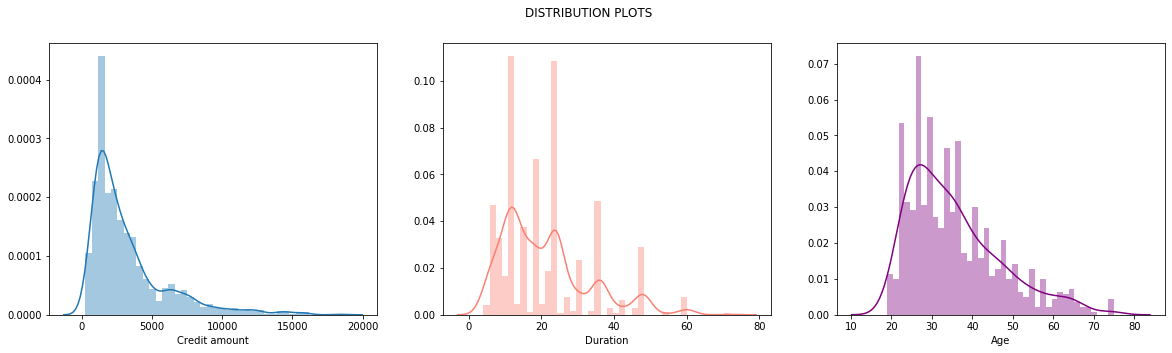

In [10]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(df['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df['Age'], bins=40, ax=ax[2], color='purple');

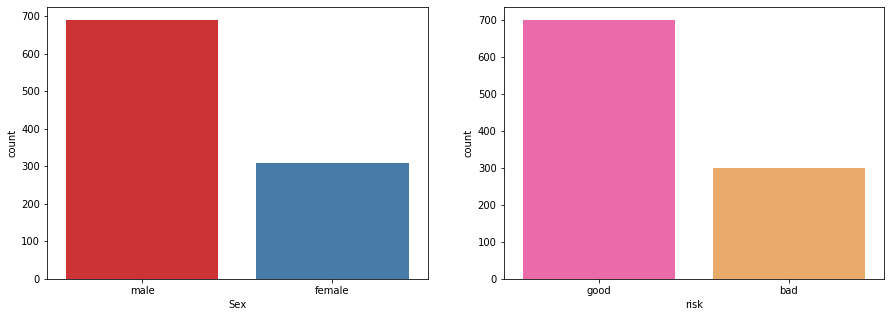

In [28]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(df['Sex'], ax=ax[0], palette='Set1');
sns.countplot(df.risk, ax=ax[1], palette='spring');

Bivariate Analysis

In [26]:
def scatters(df, h=None, pal='Set1'):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

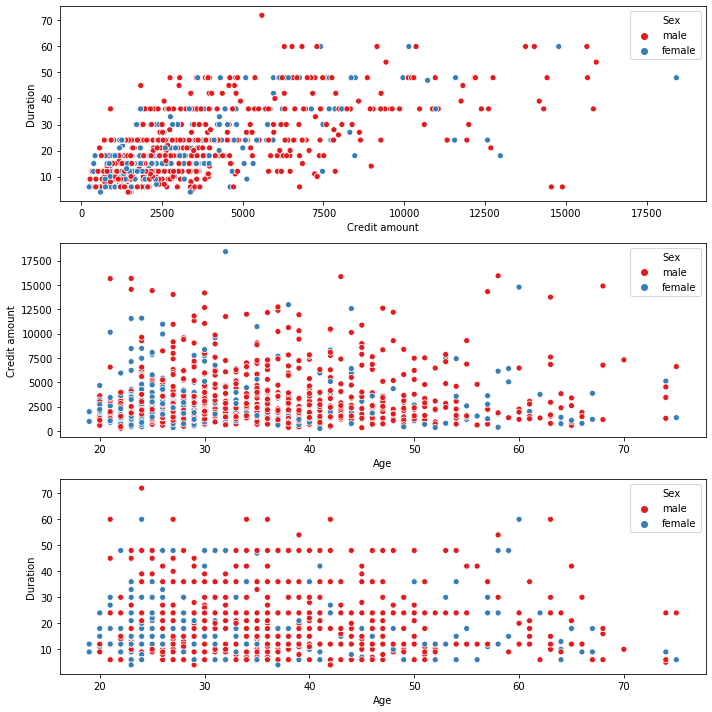

In [27]:
scatters(df, 'Sex')

In [19]:
def scatters_2(df, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

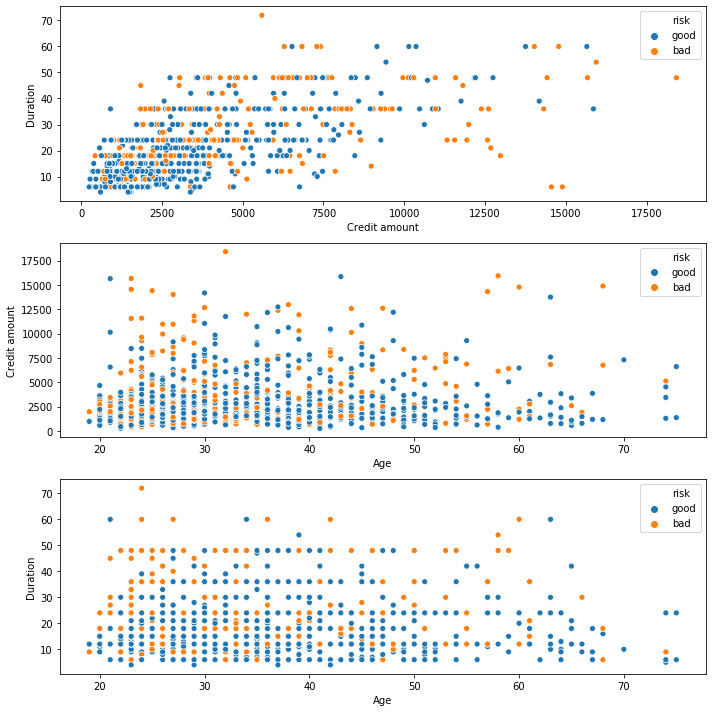

In [17]:
scatters_2(df, 'risk')

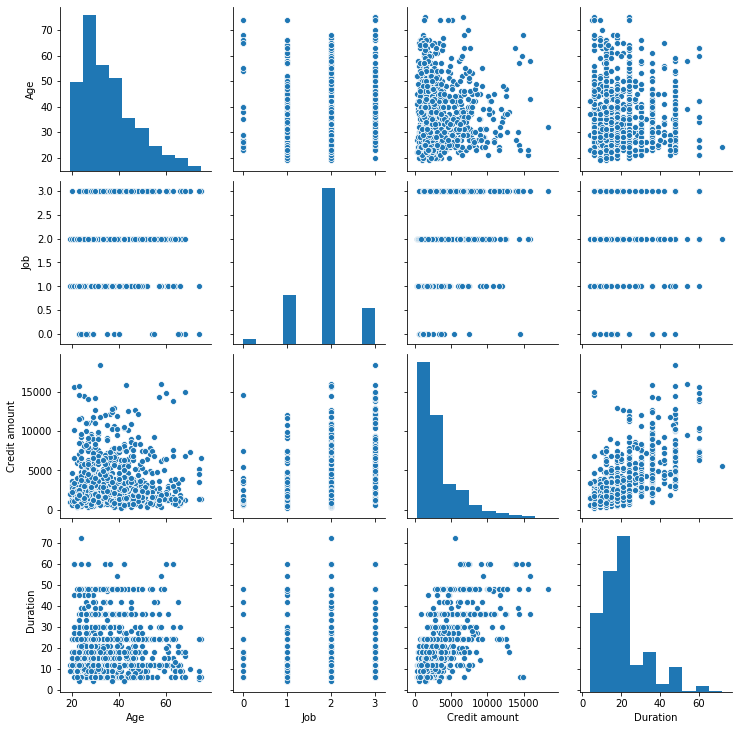

In [20]:
sns.pairplot(df)

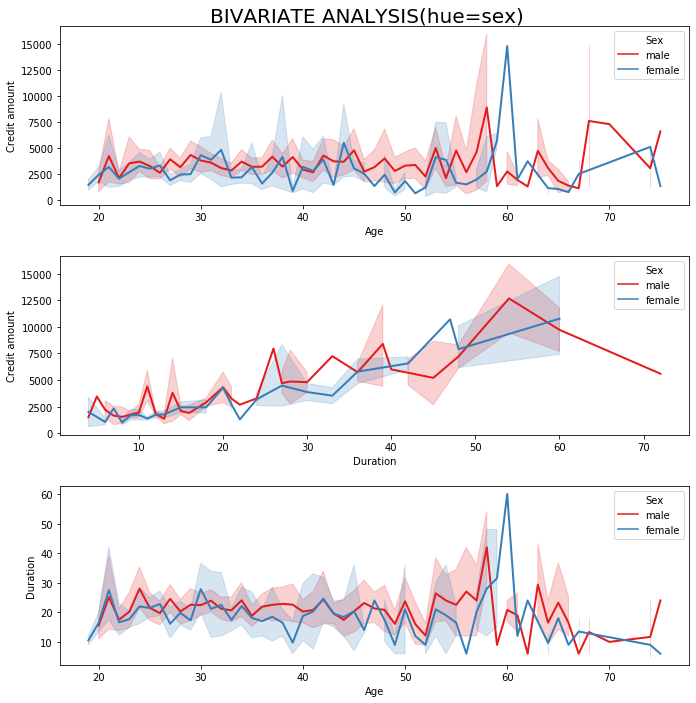

In [110]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS(hue=sex)', fontsize=20)
plt.tight_layout(3)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', palette='Set1', lw=2, ax=ax[0]);
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', palette='Set1', lw=2, ax=ax[1]);
sns.lineplot(data=df, x='Age', y='Duration', hue='Sex', lw=2, palette='Set1', ax=ax[2]);

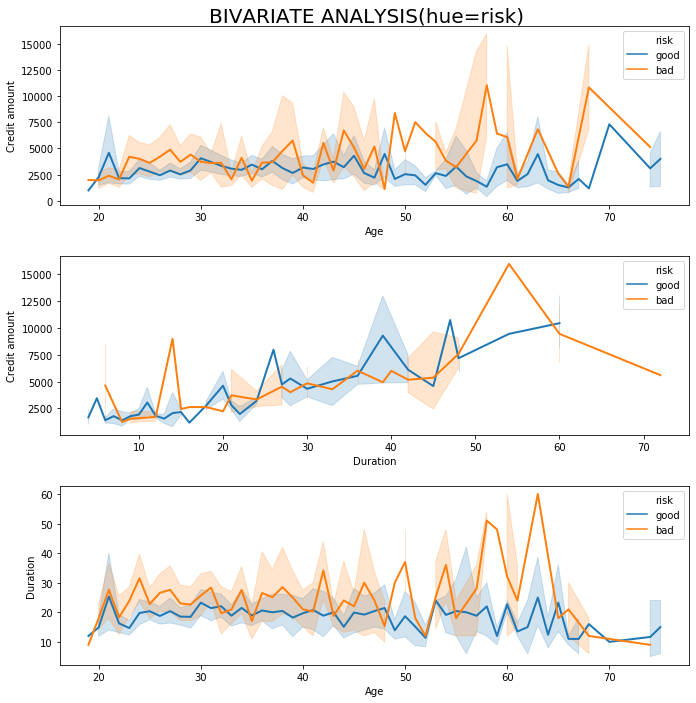

In [22]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS(hue=risk)', fontsize=20)
plt.tight_layout(3)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='risk', lw=2, ax=ax[0]);
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='risk', lw=2, ax=ax[1]);
sns.lineplot(data=df, x='Age', y='Duration', hue='risk', lw=2, ax=ax[2]);

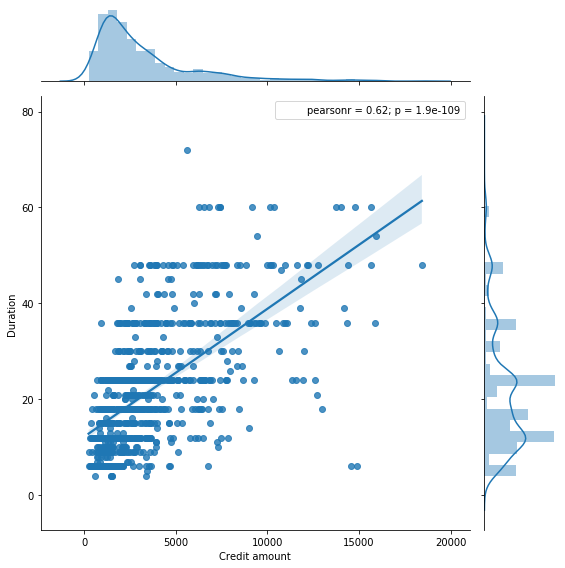

In [24]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

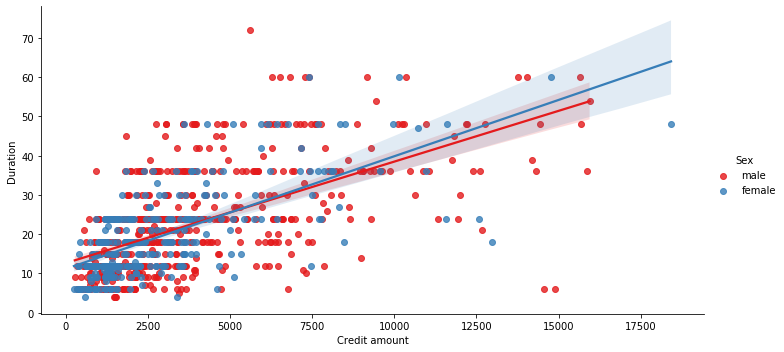

In [25]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

# EDA for purpose feature

In [34]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, palette='Set1', data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

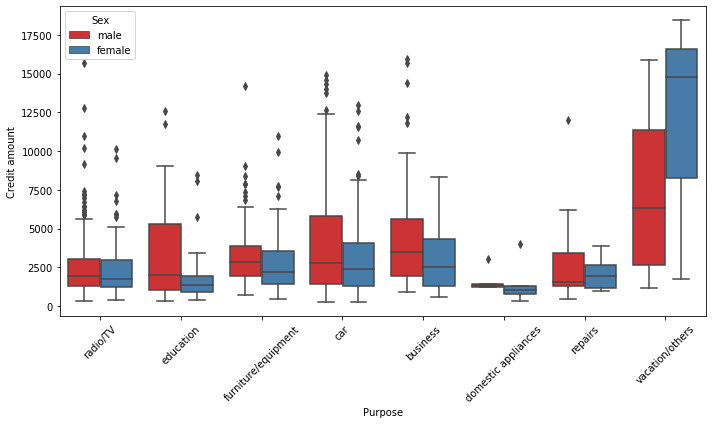

In [35]:
boxes('Purpose', 'Credit amount', 'Sex')

In [37]:
def boxes_2(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

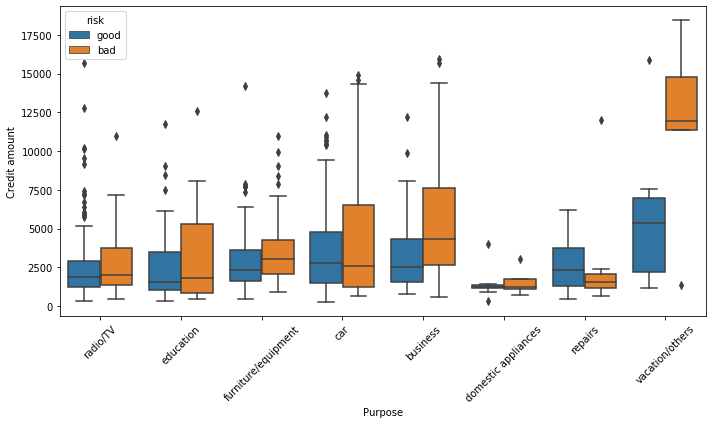

In [38]:
boxes_2('Purpose', 'Credit amount', 'risk')

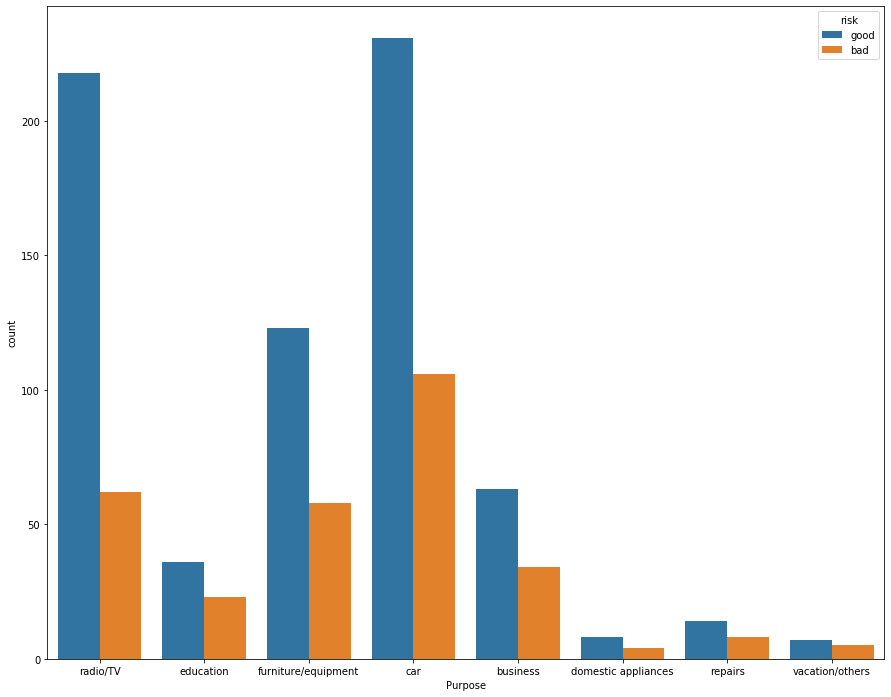

In [45]:
plt.figure(figsize=(15,12))
sns.countplot(df['Purpose'], hue=df.risk, data=df)
plt.show()

# EDA by savings account analysis

In [48]:
def savings(x,y,h, r=30):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, palette='Set1', data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

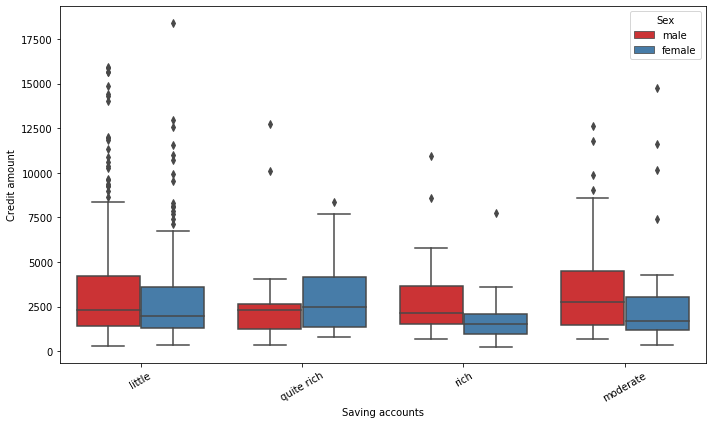

In [49]:
savings('Saving accounts', 'Credit amount', 'Sex')

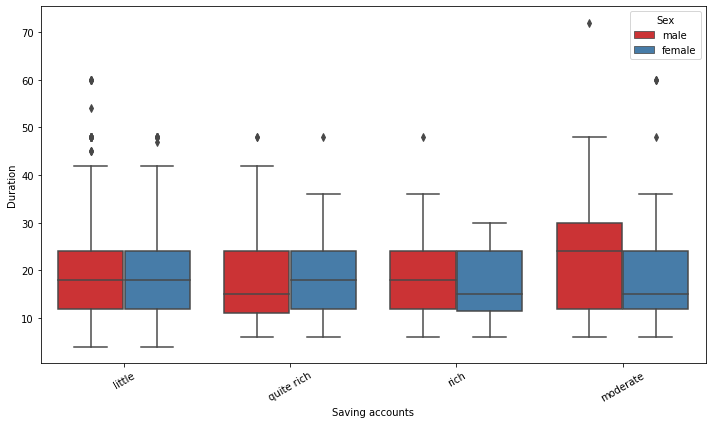

In [52]:
savings('Saving accounts', 'Duration', 'Sex')

In [53]:
def savings_2(x,y,h, r=30):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

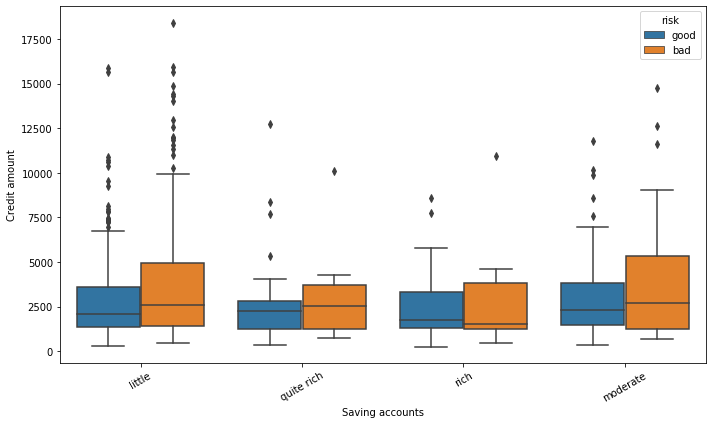

In [54]:
savings_2('Saving accounts', 'Credit amount', 'risk')

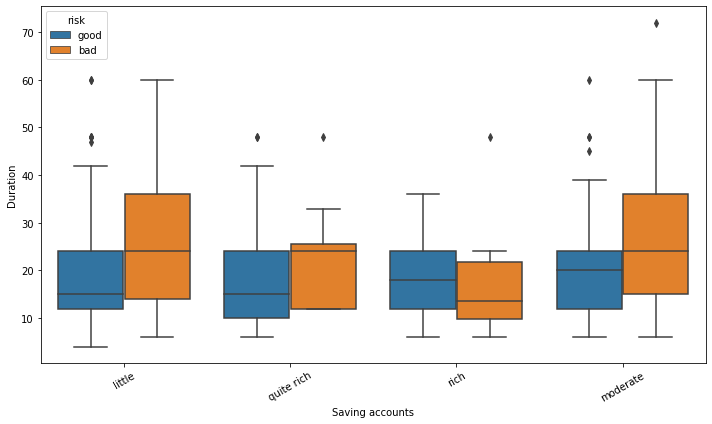

In [56]:
savings_2('Saving accounts','Duration', 'risk')

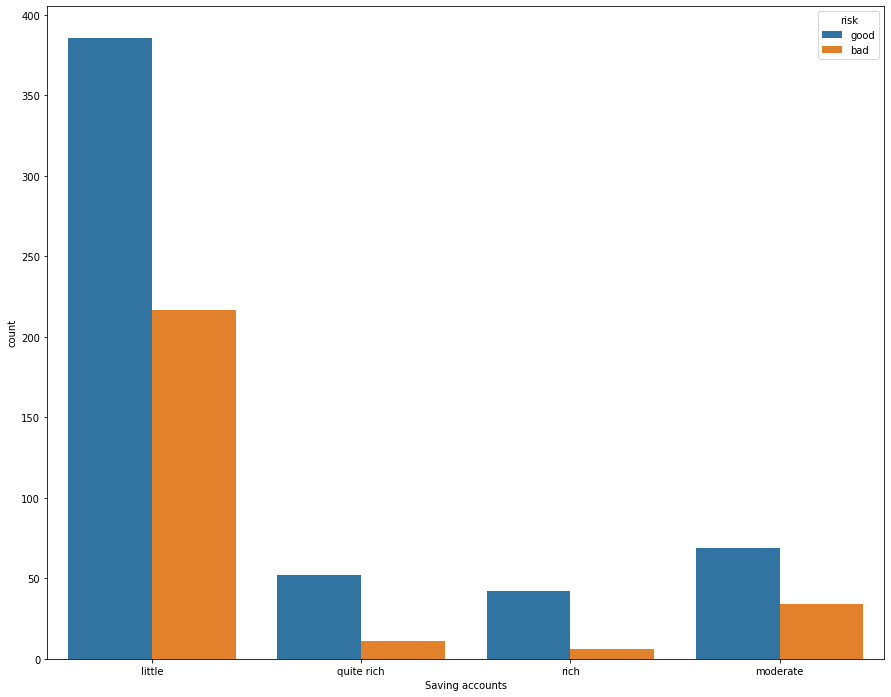

In [59]:
plt.figure(figsize=(15,12))
sns.countplot(df['Saving accounts'], hue=df.risk, data=df)
plt.show()

# EDA by job feature

In [65]:
def jobs(x,y,h,r=0):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, palette='Set1' ,data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

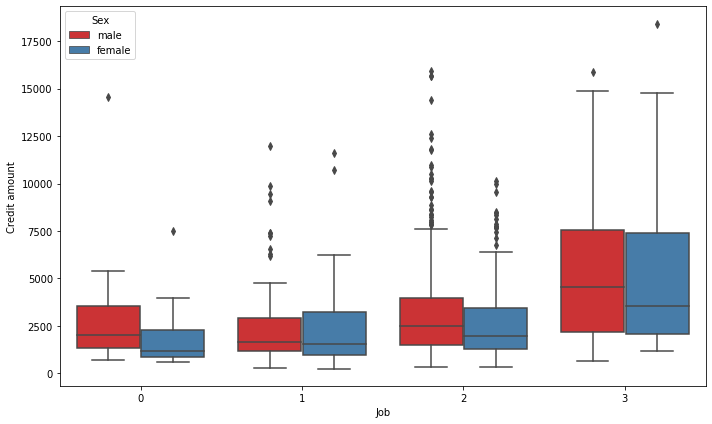

In [66]:
jobs('Job', 'Credit amount','Sex')

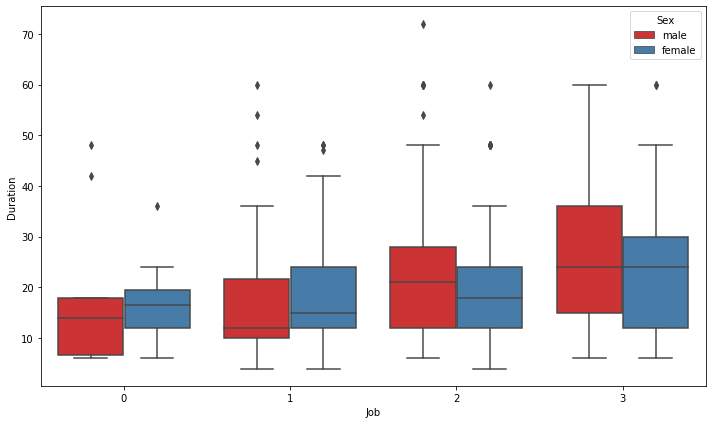

In [69]:
jobs('Job', 'Duration', 'Sex')

In [67]:
def jobs_2(x,y,h,r=0):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h,data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

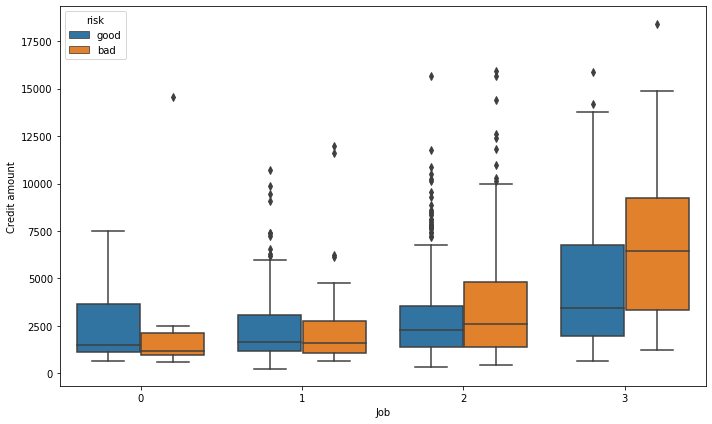

In [70]:
jobs_2('Job', 'Credit amount', 'risk')

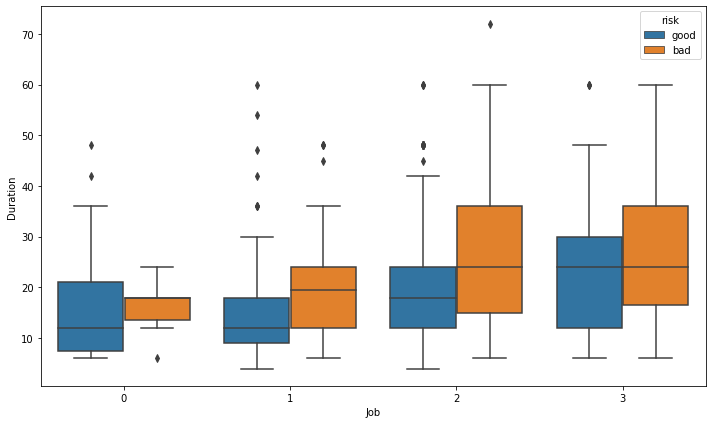

In [71]:
jobs_2('Job', 'Duration', 'risk')

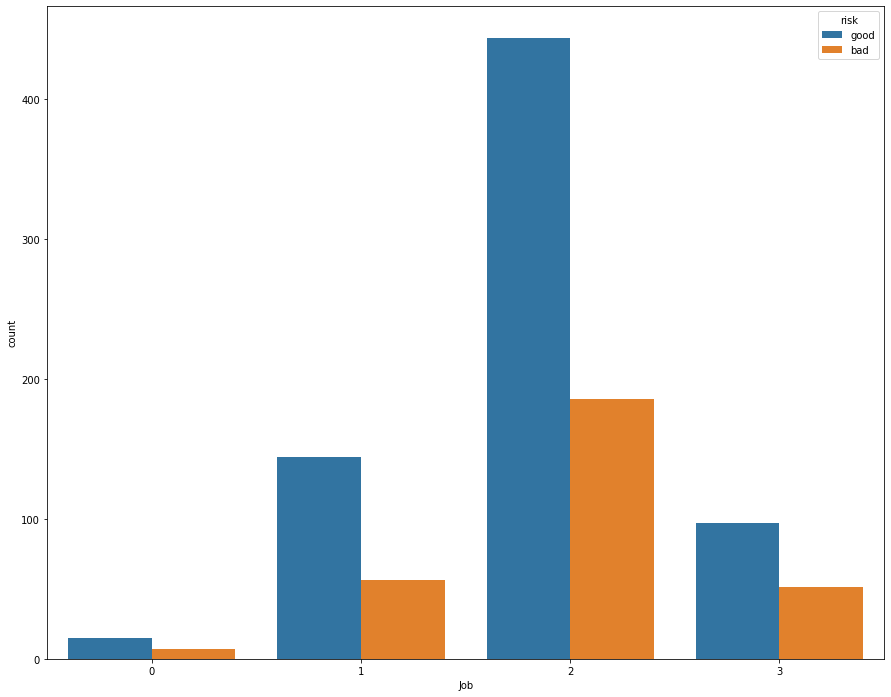

In [72]:
plt.figure(figsize=(15,12))
sns.countplot(df['Job'], hue=df.risk, data=df)
plt.show()

# Data preprocessiong for K-means Clustering

In [78]:
selected_columns = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_columns]

In [79]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

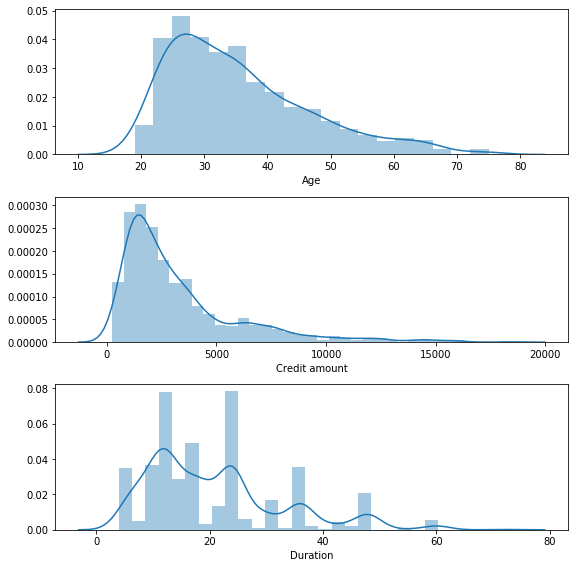

In [80]:
distributions(cluster_data)

We can see that distributions are right-skewed. To get better results we should remove the skewness by logarithmic transformation

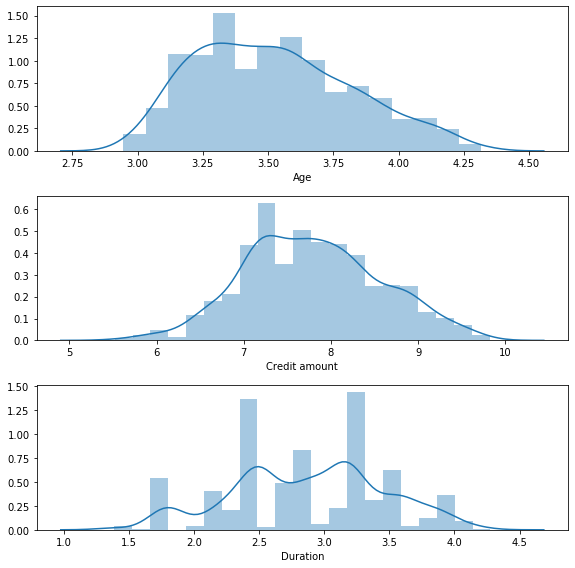

In [81]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

As seen above, the skewness has been eliminated.

# Implementation of K-means clustering

In [82]:
scalar = StandardScaler()

In [83]:
cluster_scaled = scalar.fit_transform(cluster_log)

In [85]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

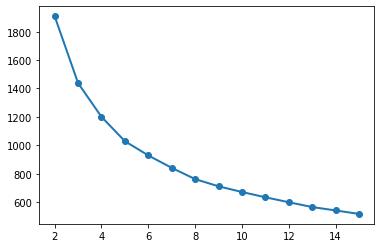

In [88]:
plt.figure()
plt.plot(np.arange(2,16),inertias, lw=2, marker='o')

# *As seen above the ideal number of clusters is 3.*

In [97]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(cluster_scaled)

# Visualizing the clusters using Scaatter plot

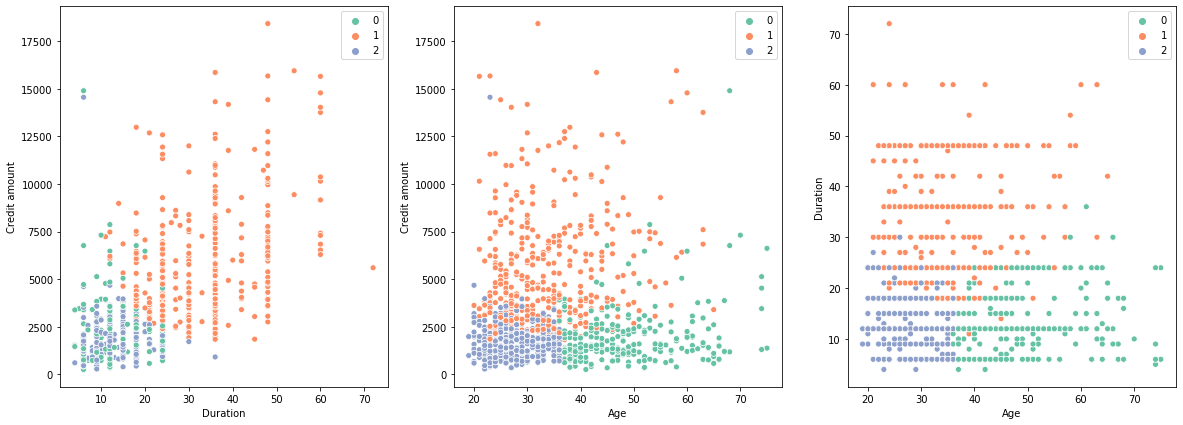

In [106]:
fig, ax  = plt.subplots(1,3,figsize=(20,7))
sns.scatterplot(df['Duration'], df['Credit amount'], hue=clusters, ax=ax[0], palette='Set2');
sns.scatterplot(df['Age'], df['Credit amount'], hue=clusters, ax=ax[1], palette='Set2');
sns.scatterplot(df['Age'], df['Duration'], hue=clusters, ax=ax[2], palette='Set2');

In [107]:
df_clustered = df[['Age', 'Duration', 'Credit amount']]
df_clustered['cluster'] = clusters

In [108]:
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,48.691120,13.918919,1979.745174
1,34.042667,32.224000,5665.384000
2,27.784153,14.245902,1732.199454


# Interpretations of clusters

Cluster 0 is made up of old customers 

Cluster 1 is made of middle-aged cusotmers with high credit amount


Cluster 2 is made up of younger customers with low credit amount